# Funda Analysis Notebook v2

## 1.  Importing packages & the Funda scraped data 




In [1]:
# !pip install pandas 
# !pip install gensim
# !pip install spacy
# !pip install gensim
# !pip install matplotlib
# !pip install sklearn
# !pip install keras
# !pip install tensorflow
# !pip install scikit-learn
# !pip install scipy
# !pip install nltk
# !pip install random2
# !pip install warnings-plugin
# !pip install statsmodels
# !pip install seaborn
# !pip install DateTime
# !pip install datetime3

import gensim
import numpy as np
import spacy
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import keras
import tensorflow
import statsmodels.api as sm
import sklearn
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from pandas import DataFrame, read_csv
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
import os
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

#For Scikit Regression: 

from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib notebook


unable to import 'smart_open.gcs', disabling that module
Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicoweiner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
fundadf = pd.read_csv("https://www.dropbox.com/s/etowgsprsek92wu/FINAL_FUNDA.csv?dl=1", sep='\t', error_bad_lines=False, dtype='unicode', lineterminator='\n')
pd.options.display.max_columns = None
fundadf.head(5)


,globalid,publicationdate,postcode,postcodelong,sellingprice,description,housetype,categoryhouse,constructionyear,gardenindication,totalarea,livingarea,dateofselling,city,province,country,ID,Neighborhoods,Municipality,Men,Women,0-15 years,15-25 years,25-45 years,45-65 years,65 years or older,one persons household,Households without kids,Households with kids,Population density,Buy houses,Rent houses,Total theft from home and barn,Average_income,timetosell
0,4132354,2018-03-07,1011,1011VK,410000,OPEN AVOND 12 APRIL TUSSEN 17:00 - 19:00uur VR...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,1964,0,NaN,53,2018-08-08,Amsterdam,Noord Holland,Netherlands,860,GM0363,Amsterdam,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,154 days 00:00:00.000000000
1,4087960,2018-02-01,1108,1108HC,175000,Indien u de woning zou willen bekijken mailt u...,<{portiekflat}> (<{appartement}>),<{Appartement}>,1978,0,NaN,72,2018-02-19,Amsterdam Zuidoost,Noord Holland,Netherlands,860,GM0363,Amsterdam,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,18 days 00:00:00.000000000
2,4096821,2018-02-09,3315,3315MT,279500,"Op aantrekkelijke locatie, met uitzicht op een...",<{eengezinswoning}> <{hoekwoning}>,<{Woonhuis}>,1994,1,201,130,2018-04-30,Dordrecht,Zuid Holland,Netherlands,4041,GM0505,Dordrecht,58577,59849,18872,14053,29711,33761,22029,21557,14869,18338,1508,56,43,3,24600,80 days 00:00:00.000000000
3,4134064,2018-03-08,9732,9732AM,139500,MEERPAAL 208 TE GRONINGEN\n\nEen schitterend e...,<{portiekflat}>,<{Appartement}>,1972,0,NaN,98,2018-03-19,Groningen,Groningen,Netherlands,5925,GM0014,Groningen,101299,101511,24313,47673,61815,43312,25697,75483,25488,21570,2137,38,61,4,22400,11 days 00:00:00.000000000
4,4089019,2018-02-02,6433,6433DE,239000,In de jonge en kindvriendelijke wijk Overbroek...,<{eengezinswoning}> <{2-onder-1-kapwoning}>,<{Woonhuis}>,2010,1,230,108,2018-03-30,Hoensbroek,Limburg,Netherlands,6858,GM0917,Heerlen,43100,43662,11132,9093,20368,26737,19432,20591,12405,12034,1931,46,52,5,22500,56 days 00:00:00.000000000


## 2.  Run NFM Model to extract common topics in listing descriptions



### 2.1. Removing all Dutch stopwords in the listing descriptions as we only want to extract the relevant words

In [3]:
stopWords = set (stopwords.words('dutch'))

print(len(stopWords))
print(stopWords)

101
{'heb', 'reeds', 'naar', 'wat', 'daar', 'tegen', 'dus', 'zij', 'haar', 'ook', 'u', 'na', 'deze', 'mij', 'hier', 'tot', 'in', 'om', 'als', 'wezen', 'het', 'van', 'hem', 'mijn', 'en', 'iemand', 'die', 'geen', 'voor', 'nog', 'op', 'wil', 'of', 'al', 'doen', 'met', 'omdat', 'heeft', 'zelf', 'over', 'de', 'door', 'dat', 'dit', 'hij', 'werd', 'kon', 'alles', 'want', 'hun', 'iets', 'ge', 'was', 'eens', 'zich', 'der', 'andere', 'zonder', 'meer', 'te', 'zo', 'er', 'aan', 'toch', 'toen', 'je', 'niets', 'hebben', 'had', 'nu', 'moet', 'geweest', 'uit', 'een', 'wordt', 'waren', 'zijn', 'kunnen', 'zal', 'kan', 'ik', 'dan', 'ons', 'wie', 'uw', 'niet', 'maar', 'hoe', 'ze', 'veel', 'ben', 'men', 'zou', 'me', 'ja', 'is', 'onder', 'altijd', 'doch', 'bij', 'worden'}


In [4]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stopWords, token_pattern='[a-zA-Z][a-zA-Z]{2,}')
doc_term_matrix = tfidf_vect.fit_transform(fundadf['description'].values.astype('U'))


### 2.2. Creating a probability matrix for topics

In [5]:
nmf = NMF(n_components=25, random_state=42)
nmf.fit(doc_term_matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=25, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [6]:
#retrieve the probability vector of words 

first_topic = nmf.components_[1]
top_topic_words = first_topic.argsort()[-10:]

### 2.3. Extracting top words for 25 topics

In [7]:
#the words in the data grouped by topics

for i,topic in enumerate(nmf.components_):
    print(f'Top words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top words for topic #0:
['achterzijde', 'stenen', 'overloop', 'slaapkamer', 'gelegen', 'voorzijde', 'berging', 'achterom', 'ruime', 'achtertuin']


Top words for topic #1:
['are', 'has', 'for', 'you', 'apartment', 'room', 'floor', 'with', 'and', 'the']


Top words for topic #2:
['centrale', 'per', 'maand', 'servicekosten', 'appartementencomplex', 'berging', 'lift', 'parkeerplaats', 'complex', 'appartement']


Top words for topic #3:
['waar', 'mooie', 'heerlijk', 'kunt', 'extra', 'ligt', 'ruimte', 'huis', 'grote', 'tuin']


Top words for topic #4:
['beperkingen', 'interpretatieverschillen', 'afrondingen', 'meetuitkomsten', 'eenduidige', 'meten', 'gebruiksoppervlakte', 'meting', 'nen', 'meetinstructie']


Top words for topic #5:
['collega', 'adressen', 'interesse', 'tijd', 'belang', 'geld', 'schakel', 'bespaart', 'aankoopmakelaar', 'nvm']


Top words for topic #6:
['kapwoning', 'achtertuin', 'bijkeuken', 'vrijstaande', 'auto', 'royale', 'inpandige', 'ruime', 'oprit', 'garage']


Top word

In [12]:
# Append new column with topics as numerical values
test = fundadf

topic_values = nmf.transform(doc_term_matrix)
test['Topic'] = topic_values.argmax(axis=1)
test.head(3)

,globalid,publicationdate,postcode,postcodelong,sellingprice,description,housetype,categoryhouse,constructionyear,gardenindication,totalarea,livingarea,dateofselling,city,province,country,ID,Neighborhoods,Municipality,Men,Women,0-15 years,15-25 years,25-45 years,45-65 years,65 years or older,one persons household,Households without kids,Households with kids,Population density,Buy houses,Rent houses,Total theft from home and barn,Average_income,timetosell,Topic
0,4132354,2018-03-07,1011,1011VK,410000,OPEN AVOND 12 APRIL TUSSEN 17:00 - 19:00uur VR...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,1964,0,NaN,53,2018-08-08,Amsterdam,Noord Holland,Netherlands,860,GM0363,Amsterdam,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,154 days 00:00:00.000000000,16
1,4087960,2018-02-01,1108,1108HC,175000,Indien u de woning zou willen bekijken mailt u...,<{portiekflat}> (<{appartement}>),<{Appartement}>,1978,0,NaN,72,2018-02-19,Amsterdam Zuidoost,Noord Holland,Netherlands,860,GM0363,Amsterdam,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,18 days 00:00:00.000000000,2
2,4096821,2018-02-09,3315,3315MT,279500,"Op aantrekkelijke locatie, met uitzicht op een...",<{eengezinswoning}> <{hoekwoning}>,<{Woonhuis}>,1994,1,201,130,2018-04-30,Dordrecht,Zuid Holland,Netherlands,4041,GM0505,Dordrecht,58577,59849,18872,14053,29711,33761,22029,21557,14869,18338,1508,56,43,3,24600,80 days 00:00:00.000000000,22


### 2.4. Give suitable topics a title 

Considering the output of the 25 topics above, we now select the ones that make sense and are suitable and categorize them with a name. The category name tells what a house description is focusing on. The ones that are do not make sense are later being dropped. 


In [22]:
# Insert the output in dataset as new variables

test.Topic = test.Topic.astype('str')

test.Topic = test.Topic.replace(['6'],'spacious_living')
test.Topic = test.Topic.replace(['7'],'modest_living')
test.Topic = test.Topic.replace(['11'],'antique_charme')
test.Topic = test.Topic.replace(['13'],'bathroom')
test.Topic = test.Topic.replace(['16'],'central_location')
test.Topic = test.Topic.replace(['18'],'house_materials')
test.Topic = test.Topic.replace(['21'],'penthouse')
test.Topic = test.Topic.replace(['22'],'view')

In [23]:
test = test.astype('str')


## 3. Import results of LIWC analysis & merge with Immoscout data

Outside of this notebook, the program LIWC2015 has been purchased which allowed to run multi-level linguistic analysis on the listing descriptions. The analysis has been conducted within the program LIWC2015, resulting in a new dataset with new columns that indicate the level of various linguistic features and sentiment. For more details on the particular linguistic feature, see: https://liwc.wpengine.com/compare-dictionaries/

In [11]:
liwc1 = pd.read_csv("https://www.dropbox.com/s/i8k2qwslqahczas/LIWC2015%20Results%20%28FINAL_FUNDA.csv%29.csv?dl=1", sep='\t', error_bad_lines=False, dtype='unicode', lineterminator='\n')
pd.options.display.max_columns = None

In [13]:
liwc1

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler\r
0,4132354,2018-03-07,1011,1011VK,410000,OPEN AVOND 12 APRIL TUSSEN 17:00 - 19:00uur VR...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,1964,0,NaN,53,2018-08-08,Amsterdam,Noord Holland,Netherlands,860,GM0363,Amsterdam,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,154 days 00:00:00.000000000,783,94.16,58.58,1.00,13.63,13.50,28.10,18.77,0.77,0.00,0.00,0.77,0.00,0.00,1.15,0.13,1.02,0.00,1.02,0.00,1.66,0.00,0.00,0.00,0.00,0.26,0.26,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.13,0.13,1.92,1.15,0.00,0.77,0.00,0.00,1.15,2.68,0.00,1.53,0.77,0.89,0.13,0.00,0.38,4.09,0.26,3.07,0.00,1.02,0.00\r
1,4087960,2018-02-01,1108,1108HC,175000,Indien u de woning zou willen bekijken mailt u...,<{portiekflat}> (<{appartement}>),<{Appartement}>,1978,0,NaN,72,2018-02-19,Amsterdam Zuidoost,Noord Holland,Netherlands,860,GM0363,Amsterdam,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,18 days 00:00:00.000000000,448,94.23,60.57,1.20,25.77,17.23,30.13,16.52,1.34,0.00,0.00,1.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.22,0.00,0.00,0.67,0.22,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,2.01,1.79,0.00,0.22,0.00,0.00,1.79,2.90,0.00,0.67,0.22,0.67,0.00,0.00,0.45,3.35,0.45,2.23,0.00,0.67,0.00\r
2,4096821,2018-02-09,3315,3315MT,279500,"Op aantrekkelijke locatie, met uitzicht op een...",<{eengezinswoning}> <{hoekwoning}>,<{Woonhuis}>,1994,1,201,130,2018-04-30,Dordrecht,Zuid Holland,Netherlands,4041,GM0505,Dordrecht,58577,59849,18872,14053,29711,33761,22029,21557,14869,18338,1508,56,43,3,24600,80 days 00:00:00.000000000,579,92.42,67.32,1.00,34.78,13.47,29.53,17.44,0.52,0.00,0.00,0.52,0.00,0.00,0.52,0.52,0.00,0.00,0.00,0.00,4.32,0.00,0.00,0.00,0.35,0.35,0.17,0.17,0.00,0.00,0.00,0.17,0.35,0.00,0.00,0.35,3.80,3.80,0.00,0.00,0.00,0.00,3.97,3.11,0.00,0.52,1.04,2.07,0.00,0.00,0.35,2.76,0.17,2.59,0.00,0.00,0.00\r
3,4134064,2018-03-08,9732,9732AM,139500,MEERPAAL 208 TE GRONINGEN\n\nEen schitterend e...,<{portiekflat}>,<{Appartement}>,1972,0,NaN,98,2018-03-19,Groningen,Groningen,Netherlands,5925,GM0014,Groningen,101299,101511,24313,47673,61815,43312,25697,75483,25488,21570,2137,38,61,4,22400,11 days 00:00:00.000000000,528,92.53,61.92,1.00,32.26,16.50,27.27,12.88,0.38,0.00,0.00,0.38,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,2.65,0.00,0.00,0.00,0.00,0.57,0.19,0.19,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,2.46,2.46,0.00,0.00,0.00,0.00,2.46,2.65,0.00,0.38,0.00,0.76,0.00,0.00,0.19,3.03,0.00,2.46,0.00,0.57,0.00\r
4,4089019,2018-02-02,6433,6433DE,239000,In de jonge en kindvriendelijke wijk Overbroek...,<{eengezinswoning}> <{2-onder-1-kapwoning}>,<{Woonhuis}>,2010,1,230,108,2018-03-30,Hoensbroek,Limburg,Netherlands,6858,GM0917,Heerlen,43100,43662,11132,9093,20368,26737,19432,20591,12405,12034,1931,46,52,5,22500,56 days 00:00:00.000000000,421,92.57,52.85,1.00,25.77,70.17,35.15,8.31,0.24,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.24,0.24,0.00,0.00,0.00,0.00,1.19,1.19,0.00,0.00,0.00,0.00,1.19,2.38,0.00,0.24,0.48,0.71,0.00,0.00,0.00,0.95,0.24,0.24,0.00,0.48,0.00\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172532,4613404,2018-12-31,3224,3224PG,225000,Keurig ne

In [14]:
liwc2 = liwc1
liwc2 = liwc2.drop(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'filler\r'], axis=1) 
liwc2 = liwc2.astype('str')
liwc2


,A,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu
0,4132354,783,94.16,58.58,1.00,13.63,13.50,28.10,18.77,0.77,0.00,0.00,0.77,0.00,0.00,1.15,0.13,1.02,0.00,1.02,0.00,1.66,0.00,0.00,0.00,0.00,0.26,0.26,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.13,0.13,1.92,1.15,0.00,0.77,0.00,0.00,1.15,2.68,0.00,1.53,0.77,0.89,0.13,0.00,0.38,4.09,0.26,3.07,0.00,1.02
1,4087960,448,94.23,60.57,1.20,25.77,17.23,30.13,16.52,1.34,0.00,0.00,1.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.22,0.00,0.00,0.67,0.22,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,2.01,1.79,0.00,0.22,0.00,0.00,1.79,2.90,0.00,0.67,0.22,0.67,0.00,0.00,0.45,3.35,0.45,2.23,0.00,0.67
2,4096821,579,92.42,67.32,1.00,34.78,13.47,29.53,17.44,0.52,0.00,0.00,0.52,0.00,0.00,0.52,0.52,0.00,0.00,0.00,0.00,4.32,0.00,0.00,0.00,0.35,0.35,0.17,0.17,0.00,0.00,0.00,0.17,0.35,0.00,0.00,0.35,3.80,3.80,0.00,0.00,0.00,0.00,3.97,3.11,0.00,0.52,1.04,2.07,0.00,0.00,0.35,2.76,0.17,2.59,0.00,0.00
3,4134064,528,92.53,61.92,1.00,32.26,16.50,27.27,12.88,0.38,0.00,0.00,0.38,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,2.65,0.00,0.00,0.00,0.00,0.57,0.19,0.19,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,2.46,2.46,0.00,0.00,0.00,0.00,2.46,2.65,0.00,0.38,0.00,0.76,0.00,0.00,0.19,3.03,0.00,2.46,0.00,0.57
4,4089019,421,92.57,52.85,1.00,25.77,70.17,35.15,8.31,0.24,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.24,0.24,0.00,0.00,0.00,0.00,1.19,1.19,0.00,0.00,0.00,0.00,1.19,2.38,0.00,0.24,0.48,0.71,0.00,0.00,0.00,0.95,0.24,0.24,0.00,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172532,4613404,417,91.02,58.53,1.00,25.77,13.45,35.97,13.43,0.48,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,2.16,2.16,0.00,0.00,0.00,0.00,2.16,4.08,0.00,0.24,0.24,0.24,0.00,0.00,0.00,3.12,0.24,2.64,0.00,0.24
172533,4613350,361,93.51,65.10,1.00,30.45,12.89,30.19,14.96,1.66,0.00,0.00,1.66,0.00,0.00,0.83,0.55,0.28,0.00,0.00,0.00,2.77,0.00,0.00,0.00,0.00,0.55,0.00,0.28,0.00,0.00,0.28,0.00,0.00,0.00,0.00,0.00,3.88,2.49,0.28,0.83,0.00,0.28,2.49,1.66,0.00,0.28,0.28,0.00,0.00,0.00,0.28,3.60,0.55,2.77,0.00,0.28
172534,4613388,319,90.22,63.49,1.00,31.10,9.97,32.92,14.42,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,3.76,3.45,0.00,0.31,0.00,0.00,3.76,4.39,0.00,0.63,0.00,0.31,0.00,0.00,0.00,1.88,0.00,0.94,0.00,0.94
172535,4613532,340,93.26,72.17,1.00,25.77,18.89,33.82,14.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.47,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.76,6.47,0.00,0.29,0.00,0.00,6.18,2.06,0.00,1.18,0.88,1.18,0.59,0.00,0.00,1.47,0.59,0.88,0.00,0.00


In [24]:
liwc2_merged = pd.merge(test, liwc2, how="left", left_on="globalid", right_on="A")

In [25]:
liwc2_merged = liwc2_merged.drop(['A', 'publicationdate', 'postcode', 'postcodelong', 'description', 'housetype', 'dateofselling', 'country', 'ID', 'Neighborhoods', 'Municipality'], axis=1) 


In [26]:
liwc3_merged = liwc2_merged.set_index('globalid')

In [27]:
liwc3_merged

,sellingprice,categoryhouse,constructionyear,gardenindication,totalarea,livingarea,city,province,Men,Women,0-15 years,15-25 years,25-45 years,45-65 years,65 years or older,one persons household,Households without kids,Households with kids,Population density,Buy houses,Rent houses,Total theft from home and barn,Average_income,timetosell,Topic,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu
globalid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4132354,410000,<{Appartement}>,1964,0,nan,53,Amsterdam,Noord Holland,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,154 days 00:00:00.000000000,central_location,783,94.16,58.58,1.00,13.63,13.50,28.10,18.77,0.77,0.00,0.00,0.77,0.00,0.00,1.15,0.13,1.02,0.00,1.02,0.00,1.66,0.00,0.00,0.00,0.00,0.26,0.26,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.13,0.13,1.92,1.15,0.00,0.77,0.00,0.00,1.15,2.68,0.00,1.53,0.77,0.89,0.13,0.00,0.38,4.09,0.26,3.07,0.00,1.02
4087960,175000,<{Appartement}>,1978,0,nan,72,Amsterdam Zuidoost,Noord Holland,423114,430933,126007,109354,304288,208818,105580,258090,96088,113428,5160,30,70,5,28700,18 days 00:00:00.000000000,2,448,94.23,60.57,1.20,25.77,17.23,30.13,16.52,1.34,0.00,0.00,1.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.22,0.00,0.00,0.67,0.22,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,2.01,1.79,0.00,0.22,0.00,0.00,1.79,2.90,0.00,0.67,0.22,0.67,0.00,0.00,0.45,3.35,0.45,2.23,0.00,0.67
4096821,279500,<{Woonhuis}>,1994,1,201,130,Dordrecht,Zuid Holland,58577,59849,18872,14053,29711,33761,22029,21557,14869,18338,1508,56,43,3,24600,80 days 00:00:00.000000000,view,579,92.42,67.32,1.00,34.78,13.47,29.53,17.44,0.52,0.00,0.00,0.52,0.00,0.00,0.52,0.52,0.00,0.00,0.00,0.00,4.32,0.00,0.00,0.00,0.35,0.35,0.17,0.17,0.00,0.00,0.00,0.17,0.35,0.00,0.00,0.35,3.80,3.80,0.00,0.00,0.00,0.00,3.97,3.11,0.00,0.52,1.04,2.07,0.00,0.00,0.35,2.76,0.17,2.59,0.00,0.00
4134064,139500,<{Appartement}>,1972,0,nan,98,Groningen,Groningen,101299,101511,24313,47673,61815,43312,25697,75483,25488,21570,2137,38,61,4,22400,11 days 00:00:00.000000000,14,528,92.53,61.92,1.00,32.26,16.50,27.27,12.88,0.38,0.00,0.00,0.38,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,2.65,0.00,0.00,0.00,0.00,0.57,0.19,0.19,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,2.46,2.46,0.00,0.00,0.00,0.00,2.46,2.65,0.00,0.38,0.00,0.76,0.00,0.00,0.19,3.03,0.00,2.46,0.00,0.57
4089019,239000,<{Woonhuis}>,2010,1,230,108,Hoensbroek,Limburg,43100,43662,11132,9093,20368,26737,19432,20591,12405,12034,1931,46,52,5,22500,56 days 00:00:00.000000000,14,421,92.57,52.85,1.00,25.77,70.17,35.15,8.31,0.24,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.24,0.24,0.00,0.00,0.00,0.00,1.19,1.19,0.00,0.00,0.00,0.00,1.19,2.38,0.00,0.24,0.48,0.71,0.00,0.00,0.00,0.95,0.24,0.24,0.00,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613404,225000,<{Woonhuis}>,1980,1,245,112,Hellevoetsluis,Zuid Holland,19797,20200,6213,4260,9129,12232,8163,5678,5837,6389,973,65,35,2,27500,17 days 00:00:00.000000000,0,417,91.02,58.53,1.00,25.77,13.45,35.97,13.43,0.48,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,2.16,2.16,0.00,0.00,0.00,0.00,2.16,4.08,0.00,0.24,0.24,0.24,0.00,0.00,0.00,3.12,0.24,2.64,0.00,0.24
4613350,527500,<{Woonhuis}>,2020,1,nan,146,Rotterdam,Zuid Holland,31

## 4.  Dummifying categorical variables 

This is necessary for the correlation and regression analysis. For each value of a categorical variable like "categoryhouse", a new column is created with boolean values 0 = False and 1 = True.



In [36]:
dummydf = liwc3_merged

dummydf['constructionyear'] = dummydf['constructionyear'].str.replace('-', '') .str.replace('<{Voor}>', '') .str.replace("<{Na}>", '')
dummydf['constructionyear'] = dummydf['constructionyear'].str[:4]
dummydf['Average_income'] = dummydf["Average_income"].str.replace(" ", "NaN")
dummydf['timetosell'] = dummydf['timetosell'].str.replace(r'\D', '')

dummydf1 = pd.concat([dummydf, pd.get_dummies(dummydf['categoryhouse'])], axis=1)
dummydf2 = pd.concat([dummydf1, pd.get_dummies(dummydf['constructionyear'])], axis=1)
dummydf3 = pd.concat([dummydf2, pd.get_dummies(dummydf['city'])], axis=1)
dummydf4 = pd.concat([dummydf3, pd.get_dummies(dummydf['province'])], axis=1)
dummydf5 = pd.concat([dummydf4, pd.get_dummies(dummydf['Topic'])], axis=1)

dummydf_clean = dummydf5
dummydf_clean.head(3)

,sellingprice,categoryhouse,constructionyear,gardenindication,totalarea,livingarea,city,province,Men,Women,0-15 years,15-25 years,25-45 years,45-65 years,65 years or older,one persons household,Households without kids,Households with kids,Population density,Buy houses,Rent houses,Total theft from home and barn,Average_income,timetosell,Topic,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,<{Appartement}>,<{Woonhuis}>,190,201,1005,1095,1180,1195,1300,1326,1360,1400,1441,1450,1453,1483,1485,1500,1513,1518,1519,1521,1525,1528,1534,1540,1550,1554,1555,1560,1570,1580,1583,1587,1593,1597,1598,1600,1601,1605,1606,1607,1608,1610,1611,1612,1613,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1627,1628,1630,1632,1635,1636,1638,1640,1645,1647,1648,1649,1650,1652,1655,1656,1657,1660,1661,1662,1664,1665,1666,1667,1668,1670,1671,1672,1675,1676,1680,1681,1685,1686,1687,1688,1690,1692,1695,1696,1697,1698,1699,1700,1702,1705,1710,1712,1713,1714,1715,1716,1717,1719,1720,1722,1723,1724,1725,1726,1730,1731,1732,1733,1734,1735,1736,1738,1739,1740,1742,1744,1747,1750,1751,1752,1754,1755,1756,1759,1760,1761,1763,1766,1770,1773,1774,1775,1776,1777,1779,1780,1782,1783,1784,1785,1787,1788,1789,1790,1791,1792,1793,1795,1797,1798,1799,1800,1801,1802,1804,1805,1806,1809,1810,1811,1812,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2068,Aadorp,Aagtekerke,Aalden,Aalsmeer,Aalsmeerderbrug,Aalst (GLD),Aalten,Aardenburg,Aarle Rixtel,Aartswoud,Abbenes,Achterveld,Achtmaal,Acquoij,Adorp,Aduard,Aerdenhout,Afferden (GLD),Agelo,Akersloot,Albergen,Alblasserdam,Aldtsjerk,Alem,Alkmaar,Almelo,Almen,Almere,Almkerk,Alphen (GLD),Alphen aan den Rijn,Alteveer (GN),Alteveer De Wolden,Alteveer Gemeente Noordenveld,Altforst,Ameide,Amen,America,Amerongen,Amersfoort,Ammerzoden,Amstelhoek,Amstelveen,Amstenrade,Amsterdam,Amsterdam Zuidoost,Andel,Andelst,Anderen,Ane,Angeren,Angerlo,Anjum,Ankeveen,Anloo,Annen,Annerveensche Kan,Ansen,Apeldoorn,Appelscha,Appeltern,Appingedam,Arkel,Arnemuiden,Arnhem,Asch,Asperen,Assen,Assendelft,Asten,Augustinusga,Austerlitz,Axel,Azewijn,Baak,Baarland,Baarn,Babberich,Babylonienbroek,Badhoevedorp,Baflo,Bakkeveen,Balgoij,Balkbrug,Balloerveld,Balloo,Ballum,Baneheide,Bant,Barchem,Barendrecht,Barger Compascuum,Barneveld,Basse,Batenburg,Bathmen,Bavel,Bedum,Beek (LB),Beek Montferland,Beek en Donk,Beekbergen,Beemte Broekland,Beers (NB),Beerzerveld,Beesd,Beesel,Beetsterzwaag,Beinsdorp,Belfeld,Belt Schutsloot,Beltrum,Bemmel,Beneden Leeuwen,Bennekom,Benneveld,Benschop,Bentveld,Berg En Terblijt,Bergeijk,Bergen op Zoom,Bergentheim,Bergharen,Berghem,Berkel Enschot,Bern,Best,Beugen,Beuningen (GLD),Beuningen (OV),Beusichem,Beverwijk,Biddinghuizen,Bierum,Biervliet,Biest Hout

Now, all categorical columns are dropped as we have them dummified. 

In [44]:

dummydf_2 = dummydf_clean.drop(['categoryhouse', 'constructionyear', 'city', 'province', '2068', '<{Na}> 2011', '<{Voor}> 1906', '0', '1', '2', '3', '4', '5', '8', '9', '10', '12', '14', '15', '17', '19', '20', '23', '24'], axis=1)
dummydf_2


KeyError: "['categoryhouse' 'constructionyear' 'city' 'province' '2068' '<{Na}> 2011'\n '<{Voor}> 1906' '0' '1' '2' '3' '4' '5' '8' '9' '10' '12' '14' '15' '17'\n '19' '20' '23' '24'] not found in axis"

The dataframe now has to be converted into integer format. 

The pd.to_numeric function has to be run before and after using dropna, as dropna only removes NaNs if they are integer but also changes the datatype to object again.


In [ ]:
clean_df = dummydf_2.apply(pd.to_numeric, downcast='integer', errors='coerce')
clean_df = clean_df.dropna()
clean_df = clean_df.apply(pd.to_numeric, downcast='integer', errors='coerce')
clean_df

As a result, we have a dataframe containing all suitable columns for a correlation matrix and following multiple linear regression. 

In [ ]:
# clean_df.to_csv('LIWC_Immoscout_full_integer_dataset.csv')

## 5.  Correlation Matrix



Due to the large size of the dataset, the pandas correlation function would get stuck. Therefore, the more efficient numpy is utilized to create the correlation matrix.

In [ ]:
def corr_closure(df):
    d = clean_df.values
    sums = d.sum(0, keepdims=True)
    stds = d.std(0, keepdims=True)
    n = d.shape[0]

    def corr(k=0, l=10):
        d2 = d.T.dot(d[:, k:l])
        sums2 = sums.T.dot(sums[:, k:l])
        stds2 = stds.T.dot(stds[:, k:l])

        return pd.DataFrame((d2 - sums2 / n) / stds2 / n,
                            clean_df.columns, clean_df.columns[k:l])

    return corr

In [ ]:
corr = corr_closure(clean_df)

corr_matrix = corr(0, 10055)

In [ ]:
y = pd.DataFrame(corr_matrix)
y

In [ ]:
# Replace all NaN with 0
x = y
y = y.replace([np.inf, -np.inf], np.nan)

In [ ]:
xy = y.fillna(0)

In [ ]:
# Only include correlations between two variables that are higher than 0.5. 

m = (xy.mask(np.eye(len(xy), dtype=bool)).abs() > 0.5).any()
m

In [ ]:
raw = xy.loc[m, m]
raw

In [ ]:
# Correlation matrix highlighting variables that have at least one strong correlation with another variable

correlation_matrix = raw.style.background_gradient(cmap='Blues', axis=0).set_precision(2)
correlation_matrix

In [ ]:
# correlation_matrix.to_excel("Immo_correlation_matrix.xlsx")


In [ ]:
# raw.to_csv('Immo_correlation_matrix.csv')

## 6. SciKit Multiple Linear Regression (Price)

As we want to test how the top topics & LIWC linguistic features can be used to predict the price of a real estate listing, we drop all other columns before running the regression analysis.


In [47]:
RegressionDFpre = liwc2_merged

RegressionDF = pd.concat([RegressionDFpre, pd.get_dummies(RegressionDFpre['Topic'])], axis=1)

RegressionDF = RegressionDF.drop(['timetosell', 'Topic', 'categoryhouse', 'constructionyear', 'gardenindication', 'totalarea', 'livingarea', 'city', 'province', 'Men', 'Women', '0-15 years', '15-25 years', '25-45 years', '45-65 years', '65 years or older', 'one persons household', 'Households without kids', 'Households with kids', 'Population density', 'Buy houses', 'Rent houses', 'Total theft from home and barn', 'Average_income', '0', '1', '2', '3', '4', '5', '8', '9', '10', '12', '14', '15', '17', '19', '20', '23', '24'], axis=1)

RegressionDF

,globalid,sellingprice,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,antique_charme,bathroom,central_location,house_materials,modest_living,penthouse,spacious_living,view
0,4132354,410000,783,94.16,58.58,1.00,13.63,13.50,28.10,18.77,0.77,0.00,0.00,0.77,0.00,0.00,1.15,0.13,1.02,0.00,1.02,0.00,1.66,0.00,0.00,0.00,0.00,0.26,0.26,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.13,0.13,1.92,1.15,0.00,0.77,0.00,0.00,1.15,2.68,0.00,1.53,0.77,0.89,0.13,0.00,0.38,4.09,0.26,3.07,0.00,1.02,0,0,1,0,0,0,0,0
1,4087960,175000,448,94.23,60.57,1.20,25.77,17.23,30.13,16.52,1.34,0.00,0.00,1.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.22,0.00,0.00,0.67,0.22,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,2.01,1.79,0.00,0.22,0.00,0.00,1.79,2.90,0.00,0.67,0.22,0.67,0.00,0.00,0.45,3.35,0.45,2.23,0.00,0.67,0,0,0,0,0,0,0,0
2,4096821,279500,579,92.42,67.32,1.00,34.78,13.47,29.53,17.44,0.52,0.00,0.00,0.52,0.00,0.00,0.52,0.52,0.00,0.00,0.00,0.00,4.32,0.00,0.00,0.00,0.35,0.35,0.17,0.17,0.00,0.00,0.00,0.17,0.35,0.00,0.00,0.35,3.80,3.80,0.00,0.00,0.00,0.00,3.97,3.11,0.00,0.52,1.04,2.07,0.00,0.00,0.35,2.76,0.17,2.59,0.00,0.00,0,0,0,0,0,0,0,1
3,4134064,139500,528,92.53,61.92,1.00,32.26,16.50,27.27,12.88,0.38,0.00,0.00,0.38,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,2.65,0.00,0.00,0.00,0.00,0.57,0.19,0.19,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,2.46,2.46,0.00,0.00,0.00,0.00,2.46,2.65,0.00,0.38,0.00,0.76,0.00,0.00,0.19,3.03,0.00,2.46,0.00,0.57,0,0,0,0,0,0,0,0
4,4089019,239000,421,92.57,52.85,1.00,25.77,70.17,35.15,8.31,0.24,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.24,0.24,0.00,0.00,0.00,0.00,1.19,1.19,0.00,0.00,0.00,0.00,1.19,2.38,0.00,0.24,0.48,0.71,0.00,0.00,0.00,0.95,0.24,0.24,0.00,0.48,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172532,4613404,225000,417,91.02,58.53,1.00,25.77,13.45,35.97,13.43,0.48,0.00,0.00,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,2.16,2.16,0.00,0.00,0.00,0.00,2.16,4.08,0.00,0.24,0.24,0.24,0.00,0.00,0.00,3.12,0.24,2.64,0.00,0.24,0,0,0,0,0,0,0,0
172533,4613350,527500,361,93.51,65.10,1.00,30.45,12.89,30.19,14.96,1.66,0.00,0.00,1.66,0.00,0.00,0.83,0.55,0.28,0.00,0.00,0.00,2.77,0.00,0.00,0.00,0.00,0.55,0.00,0.28,0.00,0.00,0.28,0.00,0.00,0.00,0.00,0.00,3.88,2.49,0.28,0.83,0.00,0.28,2.49,1.66,0.00,0.28,0.28,0.00,0.00,0.00,0.28,3.60,0.55,2.77,0.00,0.28,0,0,0,0,0,0,0,0
172534,4613388,275000,319,90.22,63.49,1.00,31.10,9.97,32.92,14.42,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.00,0.00,3.76,3.45,0.00,0.31,0.00,0.00,3.76,4.39,0.00,0.63,0.00,0.31,0.00,0.00,0.00,1.88,0.00,0.94,0.00,0.94,0,0,0,1,0,0,0,0
172535,4613532,179000,340,93.26,72.17,1.00,25.77,18.89,33.82,14.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.47,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.76,6.47,0.00,0.29,0.00,0.00,6.18,2.06,0.00,1.18,0.88,1.18,0.59,0.00,0.00,1.47,0.59,0.88,0.00,0.00,0,0,0,0,0,0,0,0


In [48]:

RegressionDF = RegressionDF.apply(pd.to_numeric, downcast='integer', errors='coerce')
RegressionDF = RegressionDF.dropna()
RegressionDF = RegressionDF.apply(pd.to_numeric, downcast='integer', errors='coerce')
RegressionDF

,globalid,sellingprice,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,antique_charme,bathroom,central_location,house_materials,modest_living,penthouse,spacious_living,view
0,4132354,410000,783,94.16,58.58,1.0,13.63,13.50,28.10,18.77,0.77,0.00,0.0,0.77,0.0,0.0,1.15,0.13,1.02,0.0,1.02,0.0,1.66,0.0,0.00,0.0,0.00,0.26,0.26,0.00,0.00,0.0,0.00,0.00,0.26,0.00,0.13,0.13,1.92,1.15,0.00,0.77,0.0,0.00,1.15,2.68,0.0,1.53,0.77,0.89,0.13,0.0,0.38,4.09,0.26,3.07,0.0,1.02,0,0,1,0,0,0,0,0
1,4087960,175000,448,94.23,60.57,1.2,25.77,17.23,30.13,16.52,1.34,0.00,0.0,1.34,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,2.23,0.0,0.22,0.0,0.00,0.67,0.22,0.00,0.00,0.0,0.00,0.45,0.00,0.00,0.00,0.00,2.01,1.79,0.00,0.22,0.0,0.00,1.79,2.90,0.0,0.67,0.22,0.67,0.00,0.0,0.45,3.35,0.45,2.23,0.0,0.67,0,0,0,0,0,0,0,0
2,4096821,279500,579,92.42,67.32,1.0,34.78,13.47,29.53,17.44,0.52,0.00,0.0,0.52,0.0,0.0,0.52,0.52,0.00,0.0,0.00,0.0,4.32,0.0,0.00,0.0,0.35,0.35,0.17,0.17,0.00,0.0,0.00,0.17,0.35,0.00,0.00,0.35,3.80,3.80,0.00,0.00,0.0,0.00,3.97,3.11,0.0,0.52,1.04,2.07,0.00,0.0,0.35,2.76,0.17,2.59,0.0,0.00,0,0,0,0,0,0,0,1
3,4134064,139500,528,92.53,61.92,1.0,32.26,16.50,27.27,12.88,0.38,0.00,0.0,0.38,0.0,0.0,0.38,0.38,0.00,0.0,0.00,0.0,2.65,0.0,0.00,0.0,0.00,0.57,0.19,0.19,0.00,0.0,0.19,0.00,0.00,0.00,0.00,0.00,2.46,2.46,0.00,0.00,0.0,0.00,2.46,2.65,0.0,0.38,0.00,0.76,0.00,0.0,0.19,3.03,0.00,2.46,0.0,0.57,0,0,0,0,0,0,0,0
4,4089019,239000,421,92.57,52.85,1.0,25.77,70.17,35.15,8.31,0.24,0.24,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,1.43,0.0,0.00,0.0,0.00,0.48,0.00,0.00,0.00,0.0,0.24,0.24,0.00,0.00,0.00,0.00,1.19,1.19,0.00,0.00,0.0,0.00,1.19,2.38,0.0,0.24,0.48,0.71,0.00,0.0,0.00,0.95,0.24,0.24,0.0,0.48,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172532,4613404,225000,417,91.02,58.53,1.0,25.77,13.45,35.97,13.43,0.48,0.00,0.0,0.48,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,2.16,0.0,0.00,0.0,0.00,0.24,0.00,0.00,0.00,0.0,0.00,0.24,0.00,0.00,0.00,0.00,2.16,2.16,0.00,0.00,0.0,0.00,2.16,4.08,0.0,0.24,0.24,0.24,0.00,0.0,0.00,3.12,0.24,2.64,0.0,0.24,0,0,0,0,0,0,0,0
172533,4613350,527500,361,93.51,65.10,1.0,30.45,12.89,30.19,14.96,1.66,0.00,0.0,1.66,0.0,0.0,0.83,0.55,0.28,0.0,0.00,0.0,2.77,0.0,0.00,0.0,0.00,0.55,0.00,0.28,0.00,0.0,0.28,0.00,0.00,0.00,0.00,0.00,3.88,2.49,0.28,0.83,0.0,0.28,2.49,1.66,0.0,0.28,0.28,0.00,0.00,0.0,0.28,3.60,0.55,2.77,0.0,0.28,0,0,0,0,0,0,0,0
172534,4613388,275000,319,90.22,63.49,1.0,31.10,9.97,32.92,14.42,0.00,0.00,0.0,0.00,0.0,0.0,0.31,0.31,0.00,0.0,0.00,0.0,3.45,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.31,0.31,0.00,0.00,3.76,3.45,0.00,0.31,0.0,0.00,3.76,4.39,0.0,0.63,0.00,0.31,0.00,0.0,0.00,1.88,0.00,0.94,0.0,0.94,0,0,0,1,0,0,0,0
172535,4613532,179000,340,93.26,72.17,1.0,25.77,18.89,33.82,14.41,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,6.47,0.0,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.76,6.47,0.00,0.29,0.0,0.00,6.18,2.06,0.0,1.18,0.88,1.18,0.59,0.0,0.00,1.47,0.59,0.88,0.0,0.00,0,0,0,0,0,0,0,0


In [50]:
RegressionDF1 = RegressionDF.set_index('globalid')

In [51]:
#Delete outliers 

z_price = np.abs(stats.zscore(RegressionDF1))
threshold = 3
RegressionDF1 = RegressionDF1 [(z_price < 3).all(axis=1)]

In [52]:
RegressionDF1

,sellingprice,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,ppron,i,we,you,shehe,they,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,antique_charme,bathroom,central_location,house_materials,modest_living,penthouse,spacious_living,view
globalid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4087960,175000,448,94.23,60.57,1.2,25.77,17.23,30.13,16.52,1.34,0.00,0.00,1.34,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2.23,0.0,0.22,0.0,0.0,0.67,0.22,0.00,0.00,0.0,0.00,0.45,0.00,0.00,0.0,0.0,2.01,1.79,0.00,0.22,0.00,0.00,1.79,2.90,0.0,0.67,0.22,0.67,0.00,0.0,0.45,3.35,0.45,2.23,0.0,0.67,0,0,0,0,0,0,0,0
4134064,139500,528,92.53,61.92,1.0,32.26,16.50,27.27,12.88,0.38,0.00,0.00,0.38,0.0,0.0,0.38,0.38,0.00,0.0,0.0,0.0,2.65,0.0,0.00,0.0,0.0,0.57,0.19,0.19,0.00,0.0,0.19,0.00,0.00,0.00,0.0,0.0,2.46,2.46,0.00,0.00,0.00,0.00,2.46,2.65,0.0,0.38,0.00,0.76,0.00,0.0,0.19,3.03,0.00,2.46,0.0,0.57,0,0,0,0,0,0,0,0
4180818,265000,296,93.87,65.76,1.0,31.53,19.73,34.80,16.55,2.03,0.00,0.00,2.03,0.0,0.0,0.34,0.34,0.00,0.0,0.0,0.0,2.03,0.0,0.34,0.0,0.0,0.34,0.34,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,2.70,2.03,0.00,0.68,0.00,0.00,1.69,2.03,0.0,0.68,1.01,0.34,0.00,0.0,0.34,3.72,0.00,3.72,0.0,0.00,0,0,0,0,0,0,0,0
4222742,295000,620,91.45,57.67,1.0,37.17,14.42,25.16,12.74,0.65,0.16,0.48,0.00,0.0,0.0,0.65,0.65,0.00,0.0,0.0,0.0,1.77,0.0,0.00,0.0,0.0,0.48,0.00,0.16,0.32,0.0,0.00,0.00,0.32,0.32,0.0,0.0,2.42,1.77,0.16,0.32,0.16,0.00,1.29,4.03,0.0,0.16,0.32,0.48,0.16,0.0,0.65,2.42,0.16,1.61,0.0,0.65,0,0,0,0,0,0,0,0
4232411,302000,5,93.26,50.00,1.0,25.77,5.00,40.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612953,250000,321,95.07,59.85,1.0,25.77,15.29,30.53,12.46,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2.80,0.0,0.00,0.0,0.0,0.31,0.00,0.00,0.00,0.0,0.00,0.31,0.00,0.00,0.0,0.0,3.43,2.80,0.00,0.62,0.00,0.00,3.12,1.87,0.0,0.62,0.00,0.93,0.00,0.0,0.00,1.56,0.00,1.25,0.0,0.31,0,0,0,0,0,0,0,0
4613064,625000,531,91.96,63.27,1.0,28.91,14.75,31.07,16.38,0.38,0.00,0.00,0.38,0.0,0.0,0.19,0.19,0.00,0.0,0.0,0.0,3.39,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,3.39,3.39,0.00,0.00,0.00,0.00,3.39,4.90,0.0,0.75,0.19,1.51,0.00,0.0,0.38,2.07,0.38,1.32,0.0,0.38,0,0,0,0,0,0,0,0
4613404,225000,417,91.02,58.53,1.0,25.77,13.45,35.97,13.43,0.48,0.00,0.00,0.48,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2.16,0.0,0.00,0.0,0.0,0.24,0.00,0.00,0.00,0.0,0.00,0.24,0.00,0.00,0.0,0.0,2.16,2.16,0.00,0.00,0.00,0.00,2.16,4.08,0.0,0.24,0.24,0.24,0.00,0.0,0.00,3.12,0.24,2.64,0.0,0.24,0,0,0,0,0,0,0,0


In [53]:
# First define dependent variable (Y) and all independent variables (X) and create test and train set. 

X = RegressionDF1.drop('sellingprice', axis=1)
y = RegressionDF1[['sellingprice']]


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

In [54]:
# Now, select all independent variables and run a multiple linear regression. 

multi_reg = LinearRegression()
multi_reg.fit(train_X, train_y)
y_predicted = multi_reg.predict(test_X)
print("Mean squared error: %.2f" % mean_squared_error(test_y, y_predicted))
print ("Mean absolute error: %.2f" % mean_absolute_error(test_y, y_predicted))
print('R²: %.2f' % r2_score(test_y, y_predicted))

Mean squared error: 13956581598.03
Mean absolute error: 86421.16
R²: 0.20


<IPython.core.display.Javascript object>


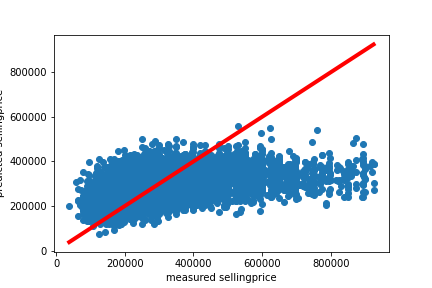

In [55]:
fig, ax = plt.subplots()
ax.scatter(test_y, y_predicted)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k-', color='red', lw=4)
ax.set_xlabel('measured sellingprice')
ax.set_ylabel('predicted sellingprice')
plt.show()

## 7. Tensorflow Neural Network (Price)



In [56]:
# Rename & extract the variable to predict
neuraldf = RegressionDF1
target = neuraldf.sellingprice
neuraldf.drop(['sellingprice'],axis = 1 , inplace = True)
neuraldf['Target'] = target

In [57]:
# Split into train & test set whereby train set is 80% of the data.

n_train = round(neuraldf.shape[0] * 0.8)
train = neuraldf[:n_train]
test = neuraldf[n_train:]

target = train['Target']
train.drop(['Target'], axis = 1, inplace = True)

truth = test['Target']
test.drop(['Target'], axis = 1, inplace = True)

In [58]:
# Initiate a sequential model (i.e., no recurrence)
NN_model = Sequential()

# Make the input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# Make hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Make the output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 107,393
Trainable params: 107,393
Non-trainable params: 0
_________________________________________________________________


### 7.1. Checkpoint callback 

A backup system that saves the models learned at each epoch. It saves only the models that are better than the previous models.

A file is made for each new model, containing the weights & biases of each neuron. Any of these files can be loaded to instantiate the corresponding network.

In [59]:
# Define how to name the files
checkpoint_name = 'FundaWeights-{epoch:03d}--{val_loss:.5f}.hdf5'
# Instantiate the checkpoint system
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

### 7.2. Training the neural network 

In [60]:
history = NN_model.fit(train, target, epochs=50, 
             # No. of randomly sampled data points used to compute the errors at each epoch (avoid overfitting)
             batch_size=32, 
             # Size of validation set for cross-validation
             validation_split = 0.2, 
             # Link to checkpoint system, to check the best model previously built
             callbacks=callbacks_list)

Train on 43473 samples, validate on 10869 samples
Epoch 1/50
43473/43473 [==============================] - 3s 79us/step - loss: 21425594855.5383 - mean_absolute_error: 107179.6641 - val_loss: 15122251703.5503 - val_mean_absolute_error: 86060.6719

Epoch 00001: val_loss improved from inf to 15122251703.55028, saving model to FundaWeights-001--15122251703.55028.hdf5
Epoch 2/50
43473/43473 [==============================] - 3s 65us/step - loss: 16937270473.8297 - mean_absolute_error: 96592.8906 - val_loss: 14770591419.7192 - val_mean_absolute_error: 92612.0781

Epoch 00002: val_loss improved from 15122251703.55028 to 14770591419.71920, saving model to FundaWeights-002--14770591419.71920.hdf5
Epoch 3/50
43473/43473 [==============================] - 3s 65us/step - loss: 16593491903.8601 - mean_absolute_error: 95369.4922 - val_loss: 14126138978.4054 - val_mean_absolute_error: 86907.5703

Epoch 00003: val_loss improved from 14770591419.71920 to 14126138978.40537, saving model to FundaWeight

43473/43473 [==============================] - 3s 75us/step - loss: 15068272843.0899 - mean_absolute_error: 89890.9062 - val_loss: 13318404764.0637 - val_mean_absolute_error: 85557.8359

Epoch 00029: val_loss did not improve from 13214769893.54973
Epoch 30/50
43473/43473 [==============================] - 3s 76us/step - loss: 15069320128.3077 - mean_absolute_error: 89814.0859 - val_loss: 13471749437.5917 - val_mean_absolute_error: 87207.6328

Epoch 00030: val_loss did not improve from 13214769893.54973
Epoch 31/50
43473/43473 [==============================] - 3s 76us/step - loss: 15115730757.3749 - mean_absolute_error: 90037.8984 - val_loss: 13230122400.1384 - val_mean_absolute_error: 83947.9062

Epoch 00031: val_loss did not improve from 13214769893.54973
Epoch 32/50
43473/43473 [==============================] - 3s 62us/step - loss: 15074038052.7397 - mean_absolute_error: 89797.6016 - val_loss: 13511269620.7651 - val_mean_absolute_error: 81055.9141

Epoch 00032: val_loss did not imp

In [61]:
# Retrieve the hitory of every epoch's training
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,loss,mean_absolute_error,epoch
45,1.315305e+10,82484.109375,1.494249e+10,89397.992188,45
46,1.330138e+10,86425.226562,1.496025e+10,89486.070312,46
47,1.304251e+10,82522.234375,1.484868e+10,89089.976562,47
48,1.313575e+10,84167.273438,1.487689e+10,89175.179688,48
49,1.359407e+10,88923.601562,1.490803e+10,89375.031250,49


In [62]:
# Check best checkpoint in local folder (the last file saved)
#   Paste the name of the last file saved by the checkpoint system
weights_file = 'FundaWeights-048--13042509377.61928.hdf5'

# Load the parameters of the models (weights & bias)
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [63]:
prediction = NN_model.predict(test)

<IPython.core.display.Javascript object>


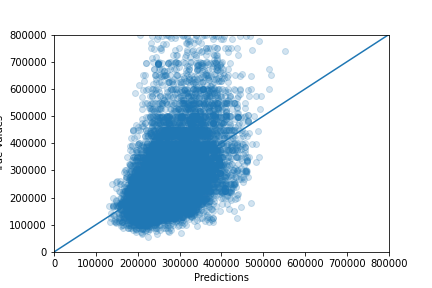

In [64]:
plt.figure()
plt.scatter(prediction, truth, alpha=0.2)
plt.xlabel('Predictions')
plt.ylabel('True Values')
lims = [0, 800000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

<IPython.core.display.Javascript object>


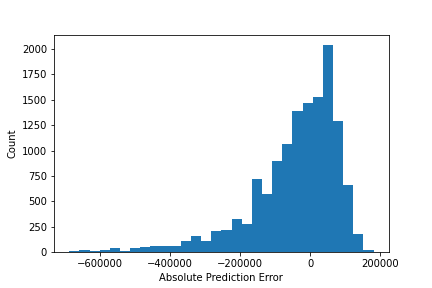

In [65]:
error = prediction - truth.to_numpy()
plt.figure()
plt.hist(error[0], bins = 30)
plt.xlabel("Absolute Prediction Error")
plt.ylabel("Count")
plt.show()